**Import Library**

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

**Import Data**

In [112]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

**Analysing Data**

In [113]:
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  Num Of Products  Has Credit Card  Is Active Member  \
0       0.00                1                1                 1   
1   83807.86                1                0                 1   
2  159660.80                3                1                 0   
3       0.00                2                0                 0   
4  125510.82                1                1                 1   

   Estimated Salary  Churn  
0         101348.88      1  
1         112542.58      0  
2         113931.57      1  
3          93826.63      0  
4          79084.10      0

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [115]:
df.describe()

CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       Num Of Products  Has Credit Card  Is Active Member  Estimated Salary  \
count     10000.000000      10000.00000      10000.000000      10000.000000   
mean          1.530200          0.70550          0.515100     100090.239881   
std           0.581654          0.45584          0.499797      57510.492818   
min           1.000000          0.00000          0.000000         11.580000   
25%           1.000000          0.00000          0.000000      51002.110000   
50%           1.000000          1.00000          1.000000     100193.915000   
75%           2.000000          1.00000          1.000000     149388.247500   
max           4.000000          1.00000          1.000000     199992.480000   

              Churn  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [116]:
df.duplicated('CustomerId').sum()

0

In [117]:
df = df.set_index('CustomerId')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [119]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [120]:
df.replace({'Geography': {'France': 2,'Germany' : 1, 'Spain': 0}},inplace=True )

In [121]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [122]:
df.replace({'Gender': {'Male': 0, 'Female':1}},inplace=True)

In [123]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [124]:
df.replace({'Num Of Products': {1: 0,2:1,3:1,4:1}},inplace=True)

In [125]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [126]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [127]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [128]:
df['Zero Balance'] =np.where(df['Balance']>0,1,0)

<Axes: >

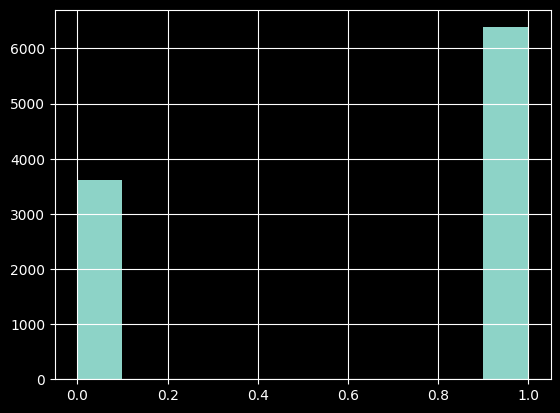

In [129]:
df['Zero Balance'].hist()

In [130]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

**Define Label and Features**

In [131]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [132]:
X = df.drop(['Surname', 'Churn'],axis =1)

In [133]:
y = df['Churn']

In [134]:
X.shape,y.shape

((10000, 11), (10000,))

In [135]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

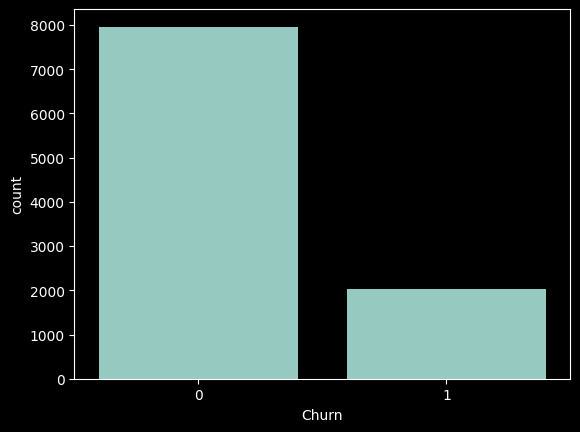

In [136]:
sns.countplot(x = 'Churn', data =df);

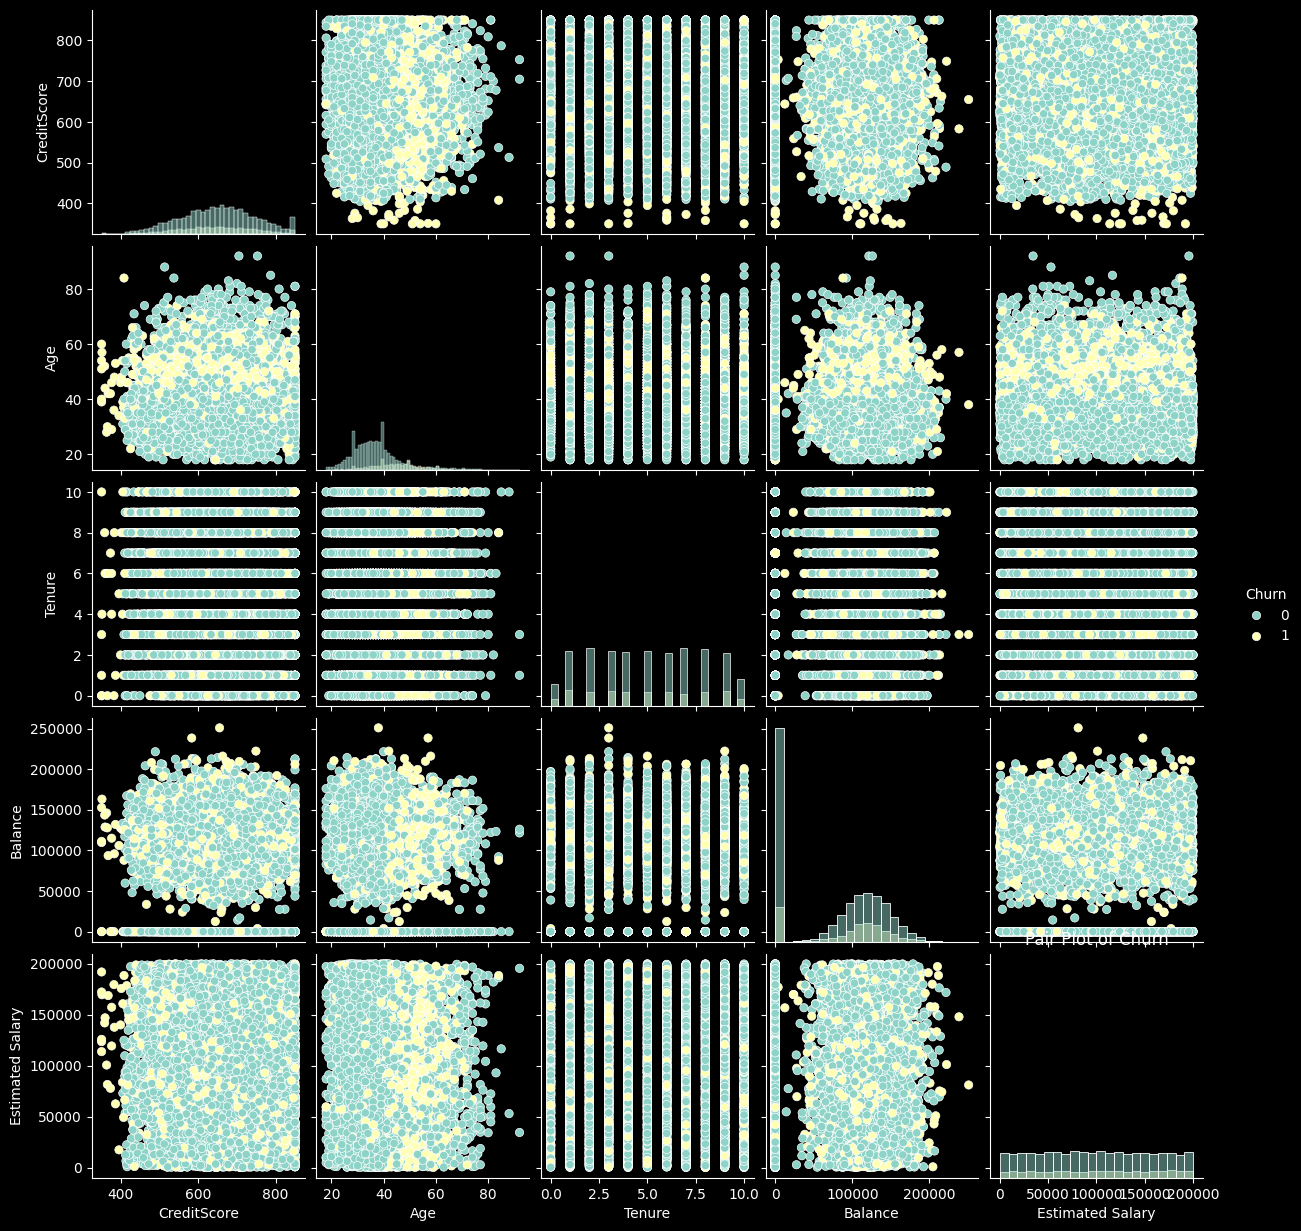

In [137]:
sns.pairplot(df, hue='Churn', vars=['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary'], diag_kind='hist')
plt.title('Pair Plot of Churn')
plt.show()

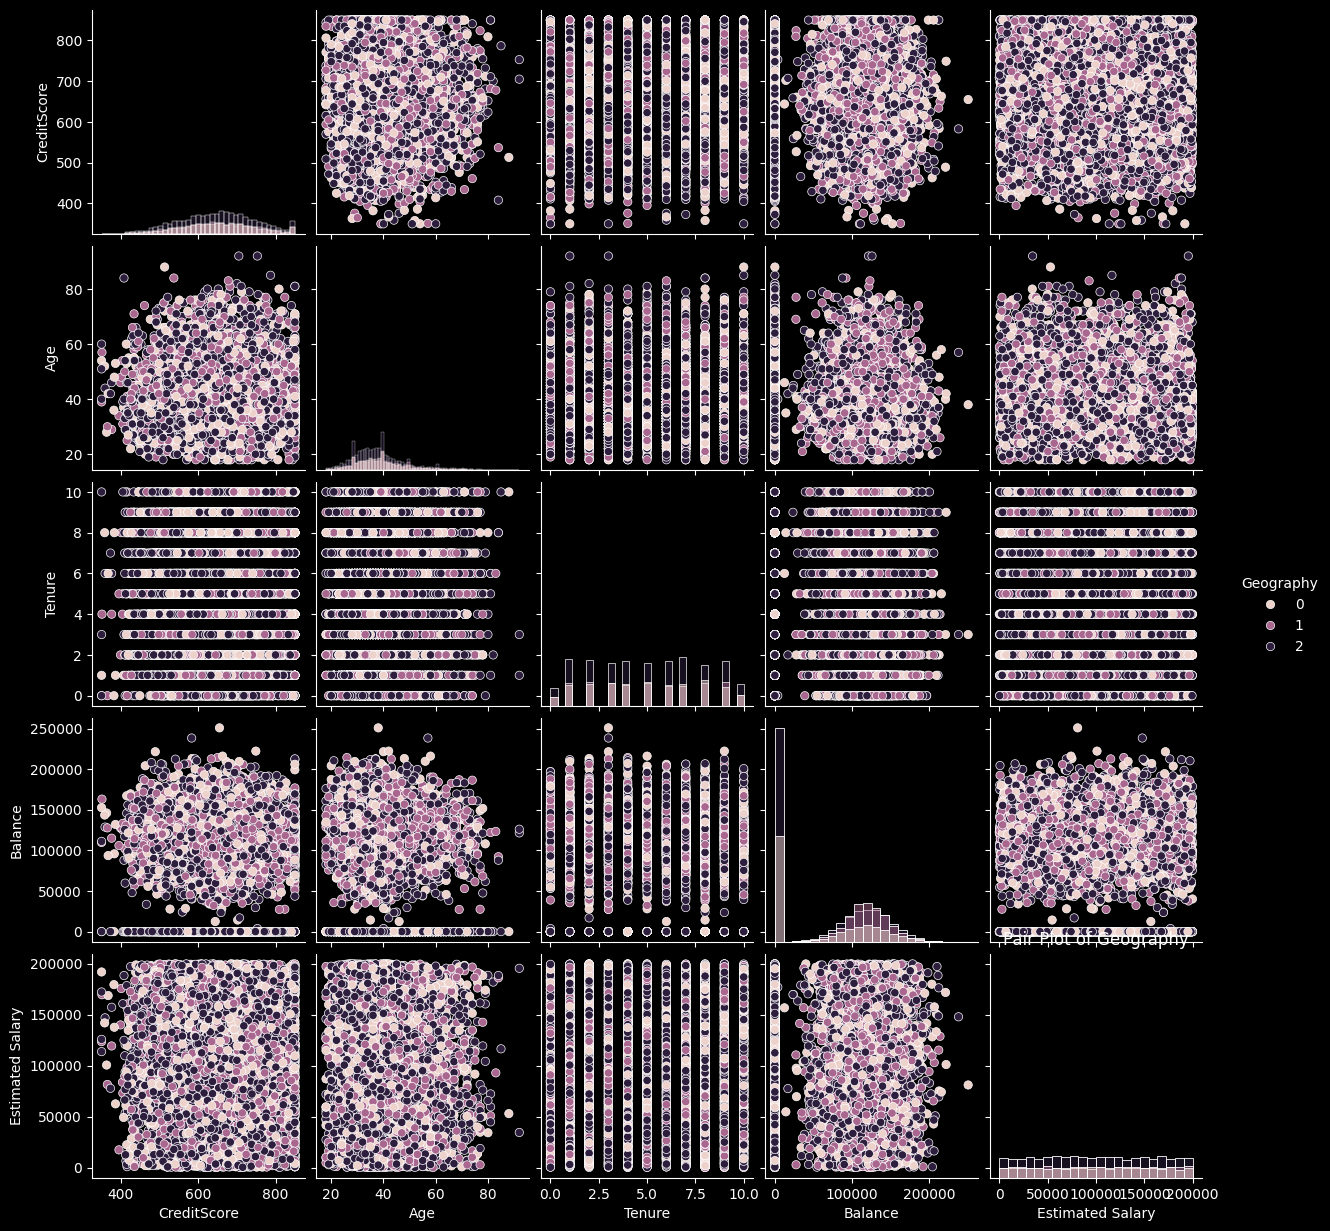

In [138]:
sns.pairplot(df, hue='Geography', vars=['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary'], diag_kind='hist')
plt.title('Pair Plot of Geography')
plt.show()

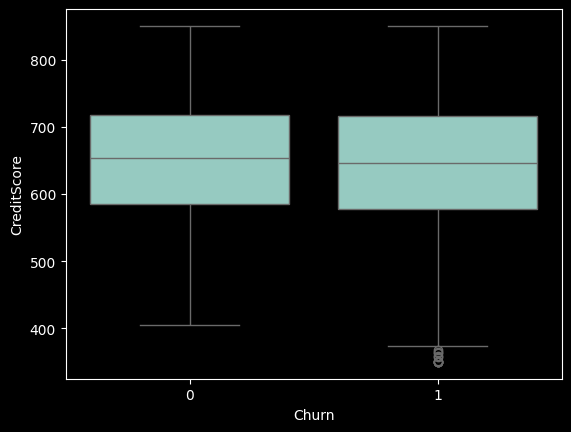

In [139]:
sns.boxplot(x='Churn', y='CreditScore', data=df)
plt.show()

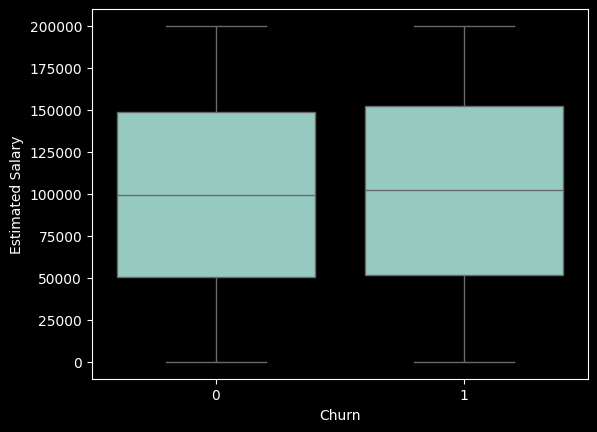

In [140]:
sns.boxplot(x='Churn', y='Estimated Salary', data=df)
plt.show()

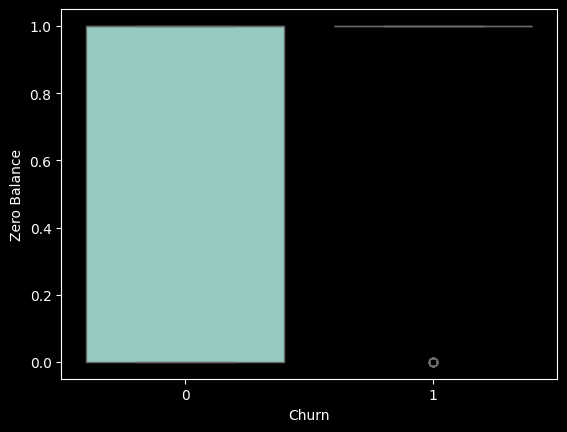

In [141]:
sns.boxplot(x='Churn', y='Zero Balance', data=df)
plt.show()

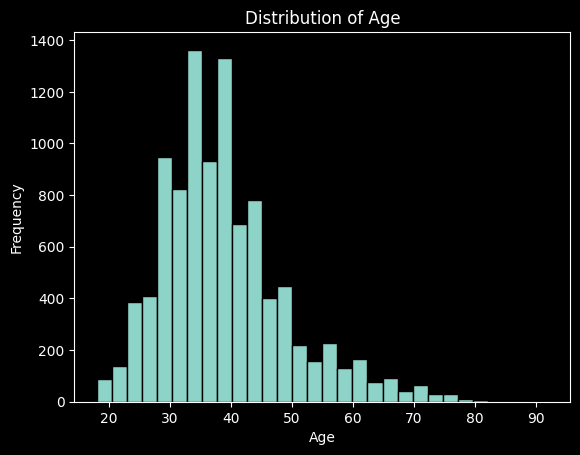

In [142]:
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

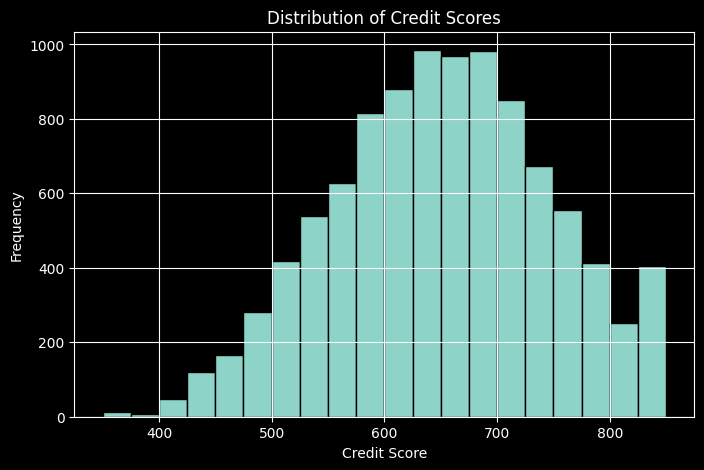

In [143]:
# Histogram of 'CreditScore'
plt.figure(figsize=(8, 5))
plt.hist(df['CreditScore'], bins=20, edgecolor='black')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Scores')
plt.grid(True)
plt.show()

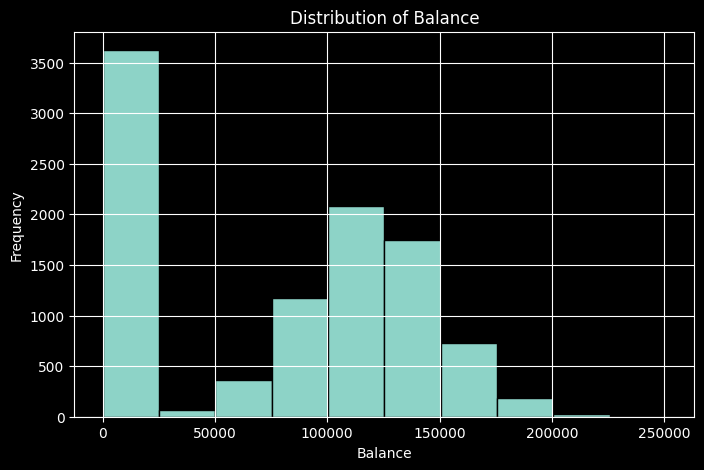

In [144]:
# Histogram of 'Balance'
plt.figure(figsize=(8, 5))
plt.hist(df['Balance'], bins=10, edgecolor='black')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Balance')
plt.grid(True)
plt.show()

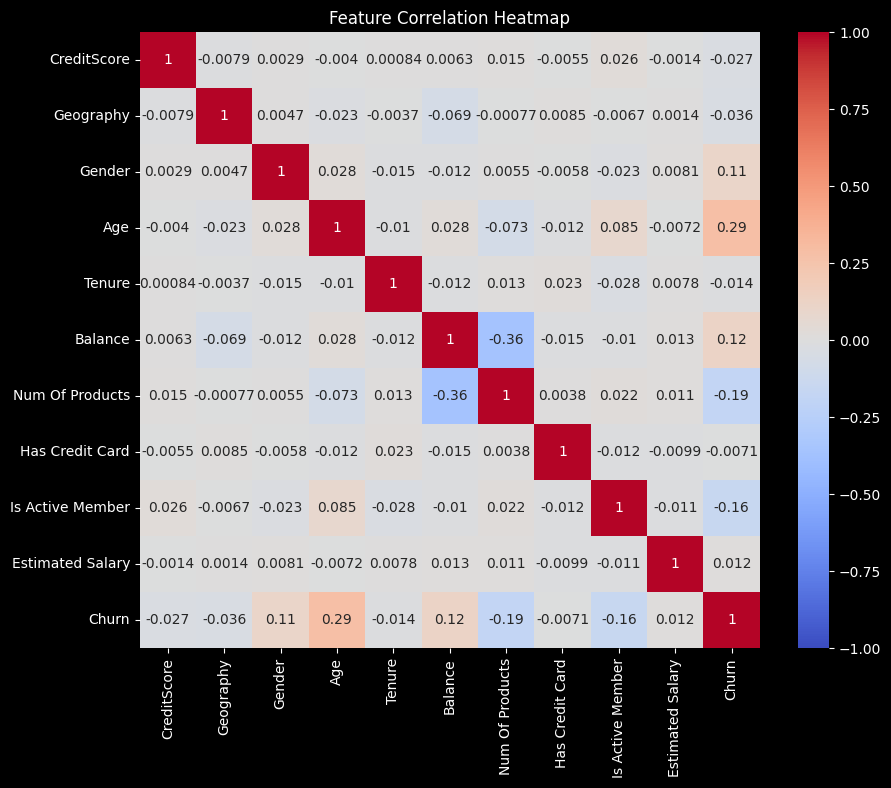

In [145]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

In [146]:
X.shape,y.shape

((10000, 11), (10000,))

**Random Under Sampling**

In [147]:
rus =RandomUnderSampler(random_state=12529)

In [148]:
X_rus, y_rus = rus.fit_resample(X,y)

In [149]:
X_rus.shape,y_rus.shape,X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [150]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [151]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

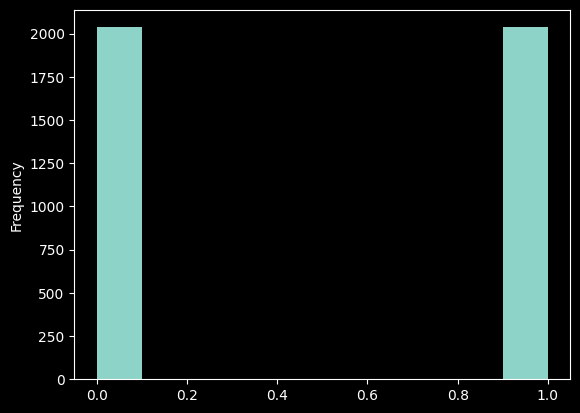

In [152]:
y_rus.plot(kind ='hist')

**Random Over Sampling**

In [153]:
ros = RandomUnderSampler(random_state=12529)

In [154]:
X_ros, y_ros = ros.fit_resample(X,y)

In [155]:
X_ros.shape, y_ros.shape, X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [156]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

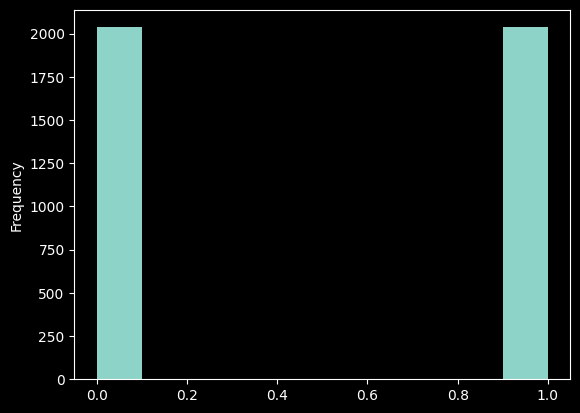

In [157]:
y_ros.plot(kind ='hist')

**Train Test Split**

**Split Original Data**

In [158]:
X_train,X_test,y_train, y_test =train_test_split(X,y,test_size=0.3,random_state =12529)

**Split Random Under Sample Data**

In [159]:
X_train_rus,X_test_rus,y_train_rus,y_test_rus = train_test_split(X_rus,y_rus,test_size=0.7)

**Split Random Over Sample Data**

In [160]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros = train_test_split(X_ros,y_ros, test_size=0.7)

**Standardize Features**

In [161]:
sc= StandardScaler()

**satandarize Original Data**

In [162]:
X_train[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [163]:
X_test[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

**Standardize Random Under Sample Data**

In [164]:
X_train_rus[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [165]:
X_test_rus[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

**Standardize Random Over Sample Data**

In [166]:
X_train_ros[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [167]:
X_test_ros[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

**Support Vector Machine Classifier**

In [168]:
svc =SVC()

In [169]:
svc.fit(X_train,y_train)

SVC()

In [170]:
y_pred = svc.predict(X_test)

**Model Accuracy**

In [171]:
cm1= confusion_matrix(y_test, y_pred)
cm1

array([[2321,   31],
       [ 491,  157]], dtype=int64)

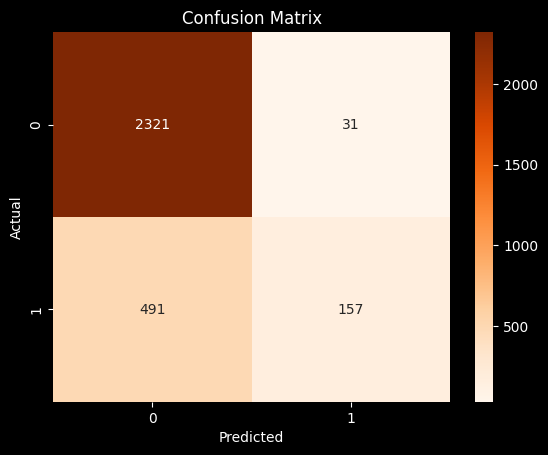

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm1, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [173]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2352
           1       0.84      0.24      0.38       648

    accuracy                           0.83      3000
   macro avg       0.83      0.61      0.64      3000
weighted avg       0.83      0.83      0.79      3000



**Hyper Parmeter Tunning**

In [174]:
param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],'kernel': ['rbf'], 
              'class_weight': ['balanced']}

In [175]:
grid = GridSearchCV(SVC(),param_grid, refit =True,verbose=2,cv= 2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [176]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [177]:
grid_predictions = grid.predict(X_test)

In [178]:
cm2= confusion_matrix(y_test,grid_predictions)

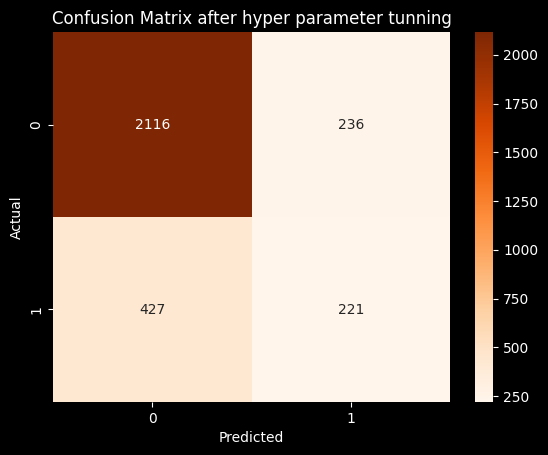

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm2, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after hyper parameter tunning')
plt.show()

In [180]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2352
           1       0.48      0.34      0.40       648

    accuracy                           0.78      3000
   macro avg       0.66      0.62      0.63      3000
weighted avg       0.76      0.78      0.76      3000



**Model with Random Under Sampling**

In [181]:
svc_rus =SVC()

In [182]:
svc_rus.fit(X_train_rus,y_train_rus)

SVC()

In [183]:
y_pred_rus= svc.predict(X_test_rus)
y_pred_rus

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

**Model Accuracy**

In [184]:
cm3= confusion_matrix(y_test_rus, y_pred_rus)
cm3

array([[1413,    7],
       [1127,  305]], dtype=int64)

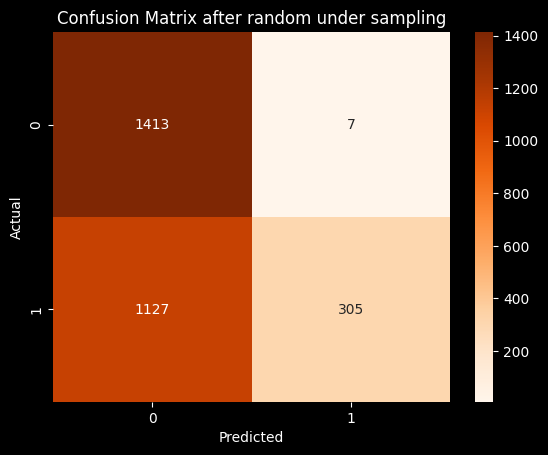

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm3, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after random under sampling')
plt.show()

In [186]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71      1420
           1       0.98      0.21      0.35      1432

    accuracy                           0.60      2852
   macro avg       0.77      0.60      0.53      2852
weighted avg       0.77      0.60      0.53      2852



**Hyperparameter Tunning**

In [187]:
param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],'kernel': ['rbf'], 
              'class_weight': ['balanced']}

In [188]:
grid_rus = GridSearchCV(SVC(),param_grid, refit =True,verbose=2,cv= 2)
grid_rus.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.9s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [189]:
print(grid_rus.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [190]:
grid_predictions_rus = grid_rus.predict(X_test_rus)
grid_predictions_rus

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [191]:
cm4= confusion_matrix(y_test_rus,grid_predictions_rus)
cm4

array([[1386,   34],
       [ 312, 1120]], dtype=int64)

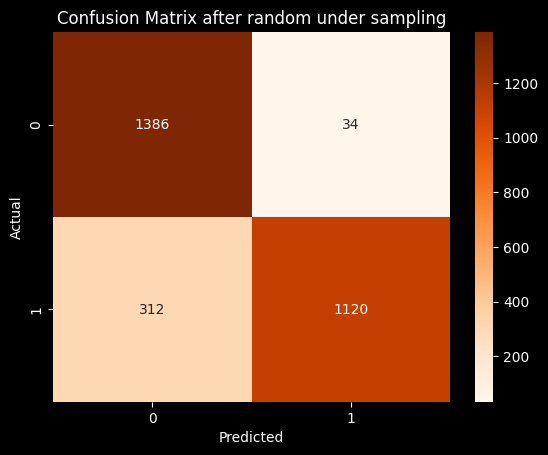

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm4, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after random under sampling')
plt.show()

In [193]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1420
           1       0.97      0.78      0.87      1432

    accuracy                           0.88      2852
   macro avg       0.89      0.88      0.88      2852
weighted avg       0.89      0.88      0.88      2852



**Model with Random over Sampling**

In [194]:
svc_ros = SVC()

In [195]:
svc_ros.fit(X_train_ros,y_train_ros)

SVC()

In [196]:
y_pred_ros = svc_ros.predict(X_test_ros)

**Model Accuracy**

In [197]:
cm5= confusion_matrix(y_test_ros,y_pred_ros)
cm5

array([[1016,  395],
       [ 392, 1049]], dtype=int64)

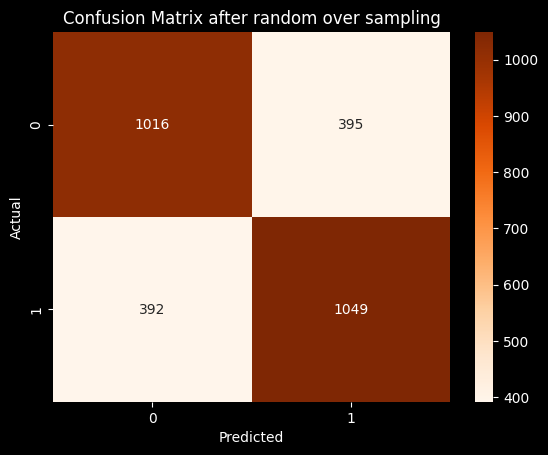

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm5, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after random over sampling')
plt.show()

In [199]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1411
           1       0.73      0.73      0.73      1441

    accuracy                           0.72      2852
   macro avg       0.72      0.72      0.72      2852
weighted avg       0.72      0.72      0.72      2852



**Hyperparameter Tunning**

In [200]:
param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],'kernel': ['rbf'], 
              'class_weight': ['balanced']}

In [201]:
grid_ros = GridSearchCV(SVC(),param_grid, refit =True,verbose=2,cv= 2)
grid_ros.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.9s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [202]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [203]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [204]:
cm6= confusion_matrix(y_test_ros,grid_predictions_ros)
cm6

array([[1373,   38],
       [ 321, 1120]], dtype=int64)

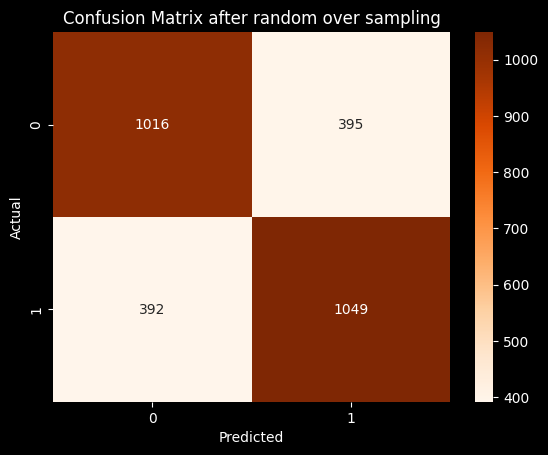

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm5, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after random over sampling')
plt.show()

In [206]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1411
           1       0.97      0.78      0.86      1441

    accuracy                           0.87      2852
   macro avg       0.89      0.88      0.87      2852
weighted avg       0.89      0.87      0.87      2852



**Lets compare**

In [207]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2352
           1       0.84      0.24      0.38       648

    accuracy                           0.83      3000
   macro avg       0.83      0.61      0.64      3000
weighted avg       0.83      0.83      0.79      3000



In [208]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2352
           1       0.48      0.34      0.40       648

    accuracy                           0.78      3000
   macro avg       0.66      0.62      0.63      3000
weighted avg       0.76      0.78      0.76      3000



In [209]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1420
           1       0.97      0.78      0.87      1432

    accuracy                           0.88      2852
   macro avg       0.89      0.88      0.88      2852
weighted avg       0.89      0.88      0.88      2852



In [210]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1411
           1       0.73      0.73      0.73      1441

    accuracy                           0.72      2852
   macro avg       0.72      0.72      0.72      2852
weighted avg       0.72      0.72      0.72      2852



In [211]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1411
           1       0.97      0.78      0.86      1441

    accuracy                           0.87      2852
   macro avg       0.89      0.88      0.87      2852
weighted avg       0.89      0.87      0.87      2852



In [212]:
# Calculate ROC curve and AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

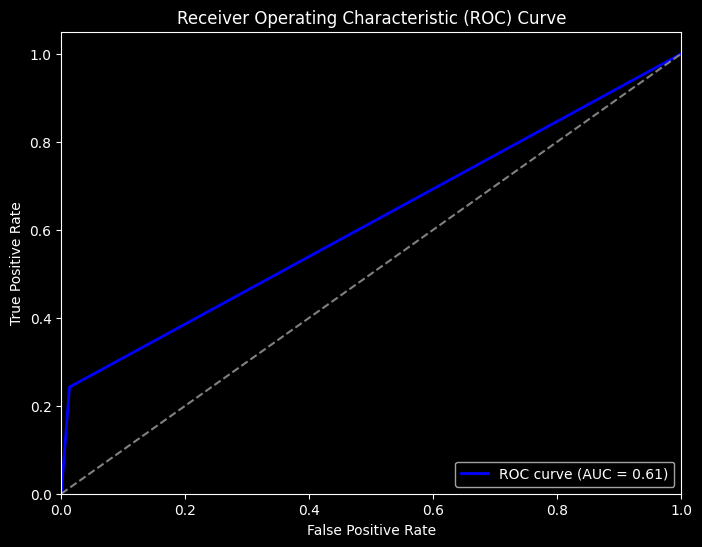

In [213]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()